# Capstone Project (Supervised ML): Pokemon Dataset
##### Team Member:
Luqman | Nicole | Amalina

### About this dataset
#### Context
This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

#### Content
- <b>name</b>: The English name of the Pokemon
- <b>japanese_name</b>: The Original Japanese name of the Pokemon
- <b>pokedex_number</b>: The entry number of the Pokemon in the National Pokedex
- <b>percentage_male</b>: The percentage of the species that are male. Blank if the Pokemon is genderless.
- <b>type1</b>: The Primary Type of the Pokemon
- <b>type2</b>: The Secondary Type of the Pokemon
- <b>classification</b>: The Classification of the Pokemon as described by the Sun and Moon Pokedex
- <b>height_m</b>: Height of the Pokemon in metres
- <b>weight_kg</b>: The Weight of the Pokemon in kilograms
- <b>capture_rate</b>: Capture Rate of the Pokemon
- <b>base_egg_steps</b>: The number of steps required to hatch an egg of the Pokemon
- <b>abilities</b>: A stringified list of abilities that the Pokemon is capable of having
- <b>experience_growth</b>: The Experience Growth of the Pokemon
- <b>base_happiness</b>: Base Happiness of the Pokemon
- <b>against_?</b>: Eighteen features that denote the amount of damage taken against an attack of a particular type
- <b>hp</b>: The Base HP of the Pokemon
- <b>attack</b>: The Base Attack of the Pokemon
- <b>defense</b>: The Base Defense of the Pokemon
- <b>sp_attack</b>: The Base Special Attack of the Pokemon
- <b>sp_defense</b>: The Base Special Defense of the Pokemon
- <b>speed</b>: The Base Speed of the Pokemon
- <b>generation</b>: The numbered generation which the Pokemon was first introduced
- <b>is_legendary</b>: Denotes if the Pokemon is legendary.

#### Acknowledgements
The data is available at https://www.kaggle.com/rounakbanik/pokemon

#### Other resources:
https://bulbapedia.bulbagarden.net/wiki/Main_Page

### Our hypothesis/goals prior to EDA and ML:
- Classify which pokemon is legendary
- Rarest pokemon is legendary
- Highest attack, defense, hp, etc. increases the chance of pokemon being a legendary
- Older generation pokemons tend to be legendary
- Pokemon with higher abilities tends to be legendary
- Dual-type pokemon tends to be legendary compared to single-type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
sns.set(style="white", font_scale=1.5)

### Original Dataset

In [2]:
#load data
df = pd.read_csv('Data/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

#### This is an inbalanced data set. Therefore, we decided to use oversampling method

In [4]:
df['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [5]:
#Drop unrelated columns
pokemon_df = df.drop(df.loc[:,['pokedex_number','japanese_name', 'name']], 
                    axis = 1)
pokemon_df.shape

(801, 38)

In [6]:
#Check for missing values for each columns

null_obj = pd.DataFrame(pokemon_df.isnull().sum(), columns = ['No. of missing values'] )
null_obj[null_obj['No. of missing values'] > 0]

,No. of missing values
height_m,20
percentage_male,98
type2,384
weight_kg,20


### EDA (Part I): Handling Missing Values

- Drop column <b>'percentage_male'</b> because it only tells the percentage of males in that particular pokemon population. It has nothing to do with predicting whether the particular pokemon species is legendary or not

In [7]:
pokemon_df = pokemon_df.drop(pokemon_df.loc[:,['percentage_male']], 
                    axis = 1)
pokemon_df.shape

(801, 37)

In [8]:
#Delete later
null_obj = pd.DataFrame(pokemon_df.isnull().sum(), columns = ['No. of missing values'] )
null_obj[null_obj['No. of missing values'] > 0]

,No. of missing values
height_m,20
type2,384
weight_kg,20


- Column <b>'height_m'</b> and <b>'weight_kg'</b> have same amount of missing values. Check both columns with NAN values.

In [9]:
index1 = pokemon_df.loc[pokemon_df['height_m'].isnull()].index
index2 = pokemon_df.loc[pokemon_df['weight_kg'].isnull()].index
index1 == index2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

- Since both columns have the same rows that contain missing values, and since bulbapedia has further information of the weight and height of the missing values, replace the missing values 
    - The information from Bulbapedia are filled in (refer list_weight and list_height)

In [10]:
missing_df = df.loc[index1,['name','weight_kg','height_m','is_legendary']]
list_weight = [3.5,18.5,30,12, 29.5, 9.9, 19.9, 0.8, 33.3, 4.2, 32, 20, 105, 300, 30, 30, 120, 45, 9, 25]
list_height = [0.3,0.7,0.8,0.6,1.0,0.6, 1.1, 0.2, 0.7, 0.4, 1.0, 0.4, 1, 1.4, 0.9, 1.2, 2, 1, 0.5, 0.8]
missing_df.head()

,name,weight_kg,height_m,is_legendary
18,Rattata,NaN,NaN,0
19,Raticate,NaN,NaN,0
25,Raichu,NaN,NaN,0
26,Sandshrew,NaN,NaN,0
27,Sandslash,NaN,NaN,0


In [11]:
pokemon_df.loc[index1, 'weight_kg'] = list_weight
pokemon_df.loc[index1, 'height_m'] = list_height

In [12]:
#Delete later
null_obj = pd.DataFrame(pokemon_df.isnull().sum(), columns = ['Null'] )
null_obj[null_obj['Null'] > 0]

,Null
type2,384


In [13]:
#Delete later
pokemon_df.shape

(801, 37)

- Not all pokemons are dual-type, there are also single-type pokemons
- Thus, it is important to replace the missing values
- Replace the missing values in type2 with string <b>'NA'</b> (not applicable)

In [14]:
pokemon_df.fillna('NA', inplace=True)

Check if there is any more missing values:

In [15]:
null_obj = pd.DataFrame(pokemon_df.isnull().sum(), columns = ['Null'] )
null_obj[null_obj['Null'] > 0]

,Null


### EDA (Part II): Exploring Categorical/Numerical Variables

In [16]:
categorical_columns = [c for c in pokemon_df.columns 
                       if pokemon_df[c].dtype.name == 'object']
numerical_columns = [c for c in pokemon_df.columns 
                     if pokemon_df[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print()
print('numerical_columns:', numerical_columns)

categorical_columns: ['abilities', 'capture_rate', 'classfication', 'type1', 'type2']

numerical_columns: ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'defense', 'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary']


- Convert column <b>'capture_rate'</b> to integer

In [17]:
#pokemon_df['capture_rate'].astype('int')

- ValueError: invalid literal for int() with base 10: '30 (Meteorite)255 (Core)'
- Get information from Bulbapedia
- Replace with the cell: '30 (Meteorite)255 (Core)' with '255'

In [18]:
pokemon_df[pokemon_df['capture_rate'] == '30 (Meteorite)255 (Core)'].index

Int64Index([773], dtype='int64')

In [19]:
pokemon_df.loc[773,'capture_rate'] = '255'

In [20]:
pokemon_df['capture_rate'] = pokemon_df['capture_rate'].astype('int')

In [21]:
#delete later
categorical_columns = [c for c in pokemon_df.columns 
                       if pokemon_df[c].dtype.name == 'object']
numerical_columns = [c for c in pokemon_df.columns 
                     if pokemon_df[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print()
print('numerical_columns:', numerical_columns)

categorical_columns: ['abilities', 'classfication', 'type1', 'type2']

numerical_columns: ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary']


- Convert column <b>'abilities'</b> to <b>'total_abilities'</b>

In [22]:
#Strip the string to convert to list type
list_abilities = []
for i in range(len(df)):
    list_abilities.append(df['abilities'][i].strip('[]').replace("'", "").split(", "))
#Convert the abilities to the no. of abilities
total_abilities = []
for i in range(len(list_abilities)):
    total_abilities.append(len(list_abilities[i]))
len(total_abilities)

801

In [23]:
#Check the no. of unique abilities, it is categorical, but should we is it important?
unique_abilities = set(x for l in list_abilities for x in l)
len(unique_abilities)

227

- Since there is 227 unique abilities, choose  column 'total abilities' over 'unique abilities'

In [24]:
#Make a new column 'total_abilities'
pokemon_df['total_abilities'] = total_abilities

In [25]:
pokemon_df = pokemon_df.drop(pokemon_df.loc[:,['abilities']], 
                    axis = 1)

In [26]:
pokemon_df.head(5)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,total_abilities
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,65,65,45,grass,poison,6.9,1,0,2
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,80,80,60,grass,poison,13.0,1,0,2
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,122,120,80,grass,poison,100.0,1,0,2
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,60,50,65,fire,NA,8.5,1,0,2
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,80,65,80,fire,NA,19.0,1,0,2


In [27]:
#delete later
categorical_columns = [c for c in pokemon_df.columns 
                       if pokemon_df[c].dtype.name == 'object']
numerical_columns = [c for c in pokemon_df.columns 
                     if pokemon_df[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print()
print('numerical_columns:', numerical_columns)

categorical_columns: ['classfication', 'type1', 'type2']

numerical_columns: ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary', 'total_abilities']


In [28]:
#No. of unique values in column 'classfication'
pokemon_df['classfication'].nunique()

588

In [29]:
#too many unique values! 
#Drop the column
pokemon_df = pokemon_df.drop(pokemon_df.loc[:,['classfication']], 
                    axis = 1)

- Make new column to indicate single-type/dual-type

In [30]:
total_types = []
for i in range(len(pokemon_df)):
    if pokemon_df['type2'][i] == 'NA':
        total_types.append(1)
    else:
        total_types.append(2)  
len(total_types)
pokemon_df['total_types'] = total_types

In [31]:
df_target = pokemon_df.pop('is_legendary') # remove column  and store it in df_target
pokemon_df['is_legendary']= df_target # add 'is_legendary' series as a 'new' column.
pokemon_df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,total_abilities,total_types,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,65,65,45,grass,poison,6.9,1,2,2,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,80,60,grass,poison,13.0,1,2,2,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,122,120,80,grass,poison,100.0,1,2,2,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,60,50,65,fire,NA,8.5,1,2,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,80,65,80,fire,NA,19.0,1,2,1,0


### Data Visualization

#### Heatmap to see correlation (Plot A)

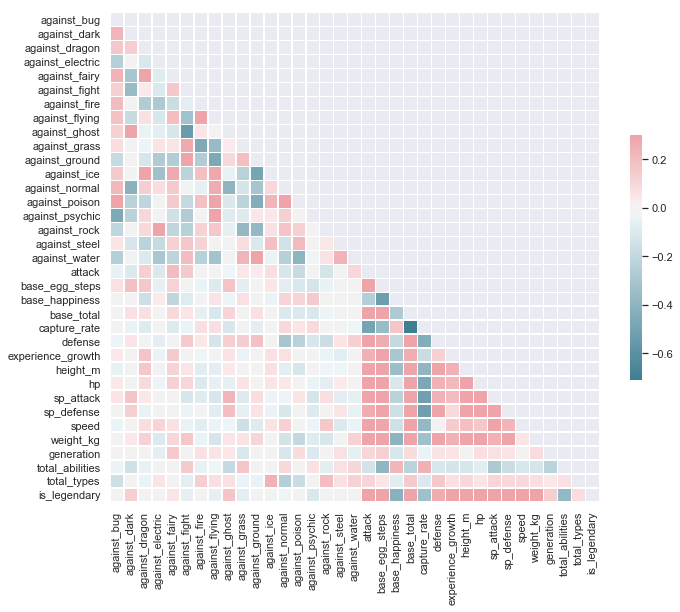

In [32]:
# Compute the correlation matrix
sns.set(font_scale=1.0)
corr = pokemon_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
legendary_count = pd.DataFrame(pokemon_df.groupby(['is_legendary']).size().reset_index(name = 'count'))
legendary_count = legendary_count.sort_values(by=['is_legendary', 'count'], ascending = True)
legendary_count

,is_legendary,count
0,0,731
1,1,70


In [34]:
type_count = pd.DataFrame(pokemon_df.groupby(['total_types']).size().reset_index(name = 'count'))
type_count = type_count.sort_values(by=['total_types', 'count'], ascending = True)
type_count



,total_types,count
0,1,384
1,2,417


### Plot B

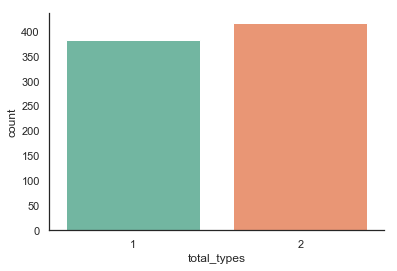

In [35]:
sns.set(style='white')
sns.barplot(type_count['total_types'],type_count['count'], palette='Set2')
sns.despine()

In [36]:
#Comment
#There are more dual-type pokemons compared to single-type pokemons

In [37]:
legendary_type = pd.DataFrame(pokemon_df.groupby(['is_legendary','total_types']).size().reset_index(name = 'count'))
legendary_type = legendary_type.sort_values(by=['is_legendary', 'count'], ascending = True)
legendary_type



,is_legendary,total_types,count
0,0,1,359
1,0,2,372
2,1,1,25
3,1,2,45


### Plot C

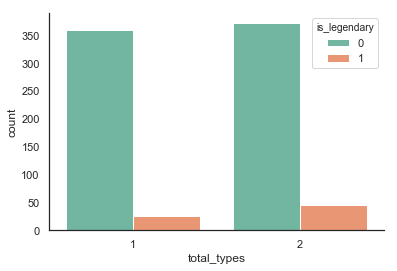

In [38]:
sns.set(style='white')
sns.barplot(legendary_type['total_types'],legendary_type['count'], palette='Set2', 
            hue=legendary_type['is_legendary'])
sns.despine()

### Plot D

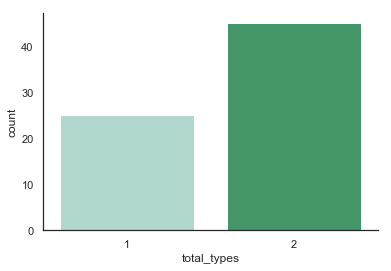

In [39]:
legendary_type1 = legendary_type[legendary_type['is_legendary'] == 1]
sns.set(style='white')
sns.barplot(legendary_type1['total_types'],legendary_type1['count'], 
            palette='BuGn')
sns.despine()

In [40]:
#Comment
#There are more legendary of dual-type compared to single-type

In [41]:
legendary_abilities = pd.DataFrame(pokemon_df.groupby(['is_legendary','total_abilities']).size().reset_index(name = 'count'))
legendary_abilities = legendary_abilities.sort_values(by=['is_legendary','total_abilities','count'], 
                                                      ascending = True)
legendary_abilities



,is_legendary,total_abilities,count
0,0,1,65
1,0,2,224
2,0,3,422
3,0,4,7
4,0,6,13
5,1,1,44
6,1,2,21
7,1,3,5


### Plot E

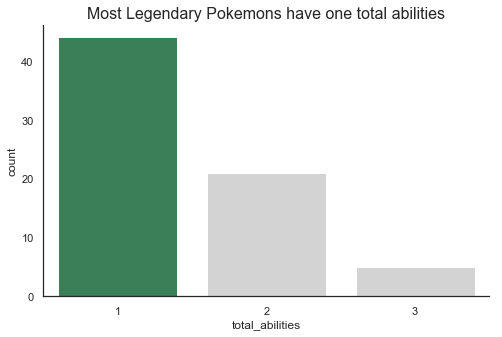

In [42]:
legendary_abilities1 = legendary_abilities[legendary_abilities['is_legendary'] == 1]

labels = legendary_abilities1['total_abilities']
values = legendary_abilities1['count']
clrs = ['lightgrey' if (x < max(values)) else 'seagreen' for x in values ]
#Configure the size
plt.figure(figsize=(8,5))
#barplot
plot_a = sns.barplot(x=labels, y=values, palette=clrs) # color=clrs
plot_a.set_title('Most Legendary Pokemons have one total abilities', fontsize=16)
sns.despine()

### Plot F

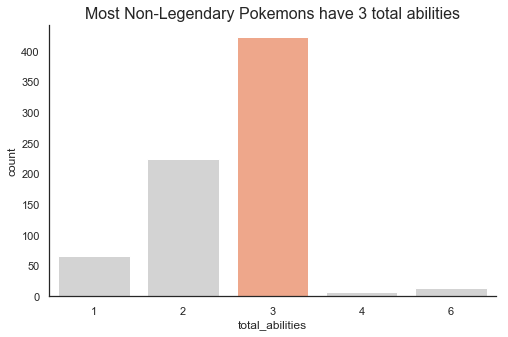

In [43]:
legendary_abilities0 = legendary_abilities[legendary_abilities['is_legendary'] == 0]

labels = legendary_abilities0['total_abilities']
values = legendary_abilities0['count']
clrs = ['lightgrey' if (x < max(values)) else 'lightsalmon' for x in values ]
#Configure the size
plt.figure(figsize=(8,5))
#barplot
plot_b = sns.barplot(x=labels, y=values, palette=clrs) # color=clrs
plot_b.set_title('Most Non-Legendary Pokemons have 3 total abilities', fontsize=16)
sns.despine()

In [44]:
legendary_type1 = pd.DataFrame(
    pokemon_df.groupby(['type1','is_legendary']).size().reset_index(name = 'count'))
legendary_type1 = legendary_type1.sort_values(by=['is_legendary','count'], 
                                              ascending = [True,False])

### Plot G

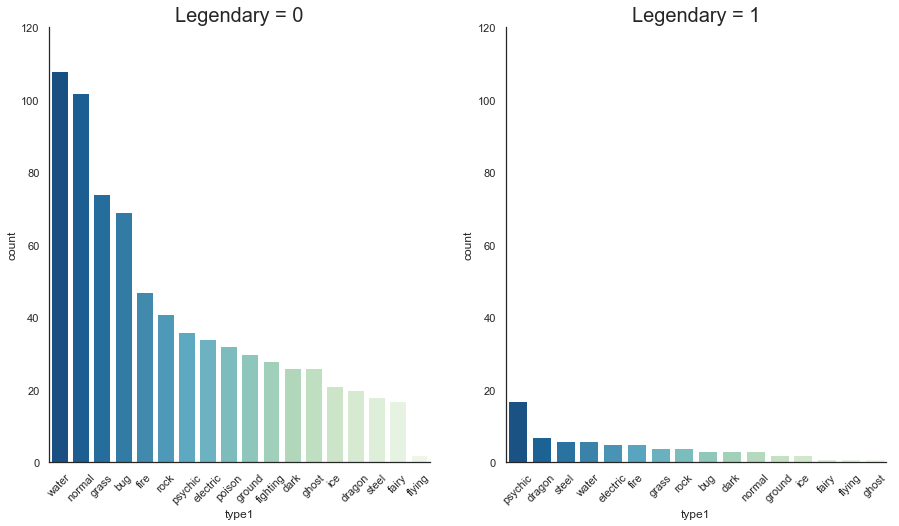

In [45]:
sns.set(style='white')
fig, ax =plt.subplots(1,2, figsize=(15,8)) #subplot 1x2

plot1 = sns.barplot(legendary_type1.iloc[:18,0],legendary_type1.iloc[:18,2],
                palette='GnBu_r', ax=ax[0])
plot2 = sns.barplot(legendary_type1.iloc[18:,0],legendary_type1.iloc[18:,2],
                palette='GnBu_r', ax=ax[1])

#rotate x labels
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=45)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=45)

#set y limits
plot1.set(ylim=(0, 120))
plot2.set(ylim=(0, 120))

plot1.set_title('Legendary = 0', fontsize=20)
plot2.set_title('Legendary = 1', fontsize=20)
sns.despine()


In [46]:
#Comment
#For type 1 pokemons:
#Most non-legendary pokemons are water type,followed by normal, and grass type
#Most legendary pokemons are psychic type,followed by dragon, steel type

In [47]:
legendary_type2 = pd.DataFrame(
    pokemon_df.groupby(['type2','is_legendary']).size().reset_index(name = 'count'))

legendary_type2 = legendary_type2.sort_values(
    by=['is_legendary', 'count'], ascending =[True, False])

In [48]:
#Single-Type Pokemons
(359+25)/801

0.4794007490636704

In [49]:
#Dual-Type Pokemons
(372+10+12+12+6+5)/801

0.5205992509363296

### Plot H

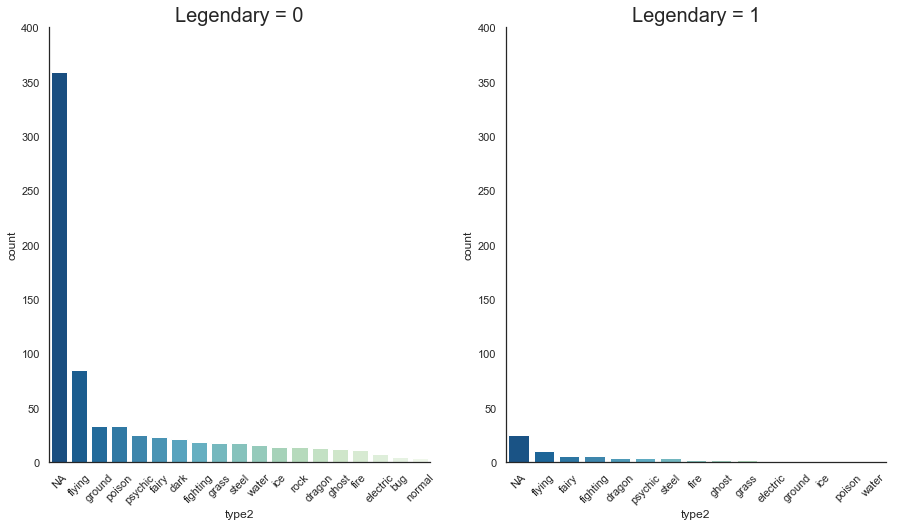

In [50]:
sns.set(style='white')
fig, ax =plt.subplots(1,2, figsize=(15,8)) #subplot 1x2

plot1 = sns.barplot(legendary_type2.iloc[:19,0],legendary_type2.iloc[:19,2],
                palette='GnBu_r', ax=ax[0])
plot2 = sns.barplot(legendary_type2.iloc[19:,0],legendary_type2.iloc[19:,2],
                palette='GnBu_r', ax=ax[1])

#rotate x labels
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=45)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=45)

#set y limits
plot1.set(ylim=(0, 400))
plot2.set(ylim=(0, 400))

plot1.set_title('Legendary = 0', fontsize=20)
plot2.set_title('Legendary = 1', fontsize=20)
sns.despine()



In [51]:
#Comment
#More than half pokemons are dual-types

In [52]:
generation_df = pokemon_df.groupby(['generation','is_legendary']
                                  )['hp','attack','speed',
                                    'sp_attack','sp_defense','weight_kg',
                                    'height_m','base_happiness','capture_rate'
                                   ].mean().astype(float).round(2).reset_index()
generation_df = generation_df.sort_values(by=['is_legendary','generation'], 
                                              ascending = [True,True])

generation_df

,generation,is_legendary,hp,attack,speed,sp_attack,sp_defense,weight_kg,height_m,base_happiness,capture_rate
0,1,0,63.29,73.49,69.03,67.40,66.50,45.51,1.18,70.72,109.43
2,2,0,68.95,68.10,59.16,63.24,70.70,41.78,1.07,68.14,97.13
4,3,0,64.08,74.08,61.10,67.45,64.86,54.20,1.12,63.84,121.85
6,4,0,69.59,79.23,65.89,69.16,70.40,54.76,1.00,69.04,88.90
8,5,0,68.27,77.61,63.15,66.00,65.31,42.88,0.96,67.31,112.20
10,6,0,67.30,71.48,64.48,71.21,70.44,42.45,0.93,68.41,107.98
12,7,0,64.76,80.24,58.68,68.21,72.98,57.50,0.97,67.78,97.43
1,1,1,95.20,105.00,103.00,127.80,104.00,58.80,1.54,41.00,11.40
3,2,1,102.83,99.17,100.00,99.17,116.33,163.83,2.60,34.17,10.00
5,3,1,85.50,116.00,94.50,123.00,126.00,228.04,2.58,38.50,7.20


In [53]:
generation_df = pokemon_df.groupby(['generation']
                                  )['hp','attack','speed',
                                    'sp_attack','sp_defense','weight_kg',
                                    'height_m','base_total','capture_rate'
                                   ].mean().astype(float).round(1).reset_index()
generation_df = generation_df.sort_values(by=['generation'], 
                                              ascending = [True])

generation_df

,generation,hp,attack,speed,sp_attack,sp_defense,weight_kg,height_m,base_total,capture_rate
0,1,64.3,74.5,70.2,69.4,67.7,46.0,1.2,416.3,106.2
1,2,71.0,70.0,61.6,65.4,73.4,49.1,1.2,413.2,91.9
2,3,65.7,77.2,63.6,71.6,69.4,67.1,1.2,420.0,113.4
3,4,73.1,82.7,70.1,74.6,74.5,76.9,1.1,451.2,78.9
4,5,70.3,80.6,66.5,70.0,67.7,52.4,1.0,427.0,103.1
5,6,71.1,76.5,66.7,76.6,73.2,51.6,1.1,437.6,100.4
6,7,70.6,84.6,64.0,75.2,75.6,97.4,1.3,448.2,87.3


### Plot I

(55, 90)

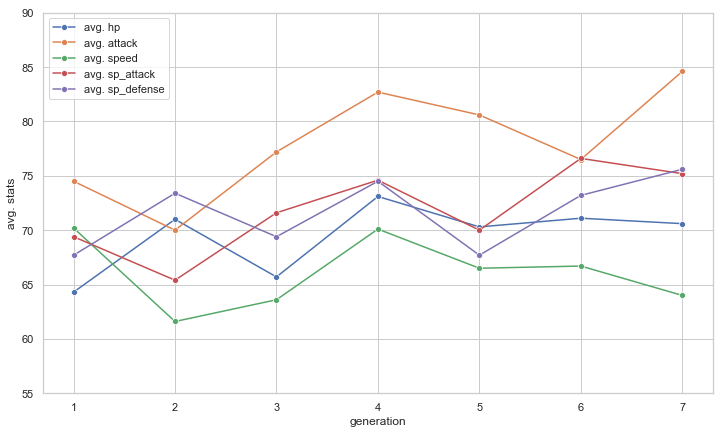

In [54]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,7))

sns.lineplot(data = generation_df,x = 'generation',y = 'hp', marker="o")
sns.lineplot(data = generation_df,x = 'generation',y = 'attack', marker="o")
sns.lineplot(data = generation_df,x = 'generation',y = 'speed', marker="o")
sns.lineplot(data = generation_df,x = 'generation',y = 'sp_attack', marker="o")
sns.lineplot(data = generation_df,x = 'generation',y = 'sp_defense', marker="o")

plt.legend(['avg. hp','avg. attack','avg. speed','avg. sp_attack','avg. sp_defense'], 
           loc='best')
plt.ylabel('avg. stats')
plt.ylim(55,90)

### Plot J

(150, 800)

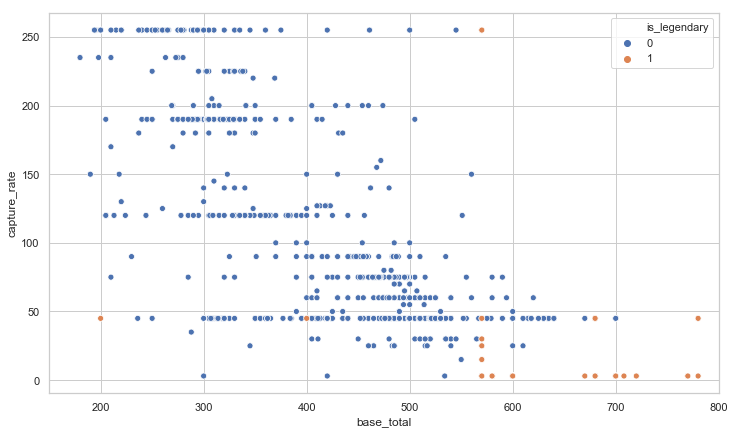

In [55]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,7))

sns.scatterplot(data = pokemon_df,x = 'base_total',y = 'capture_rate', 
                hue='is_legendary')
plt.xlim(150,800)


### Plot K

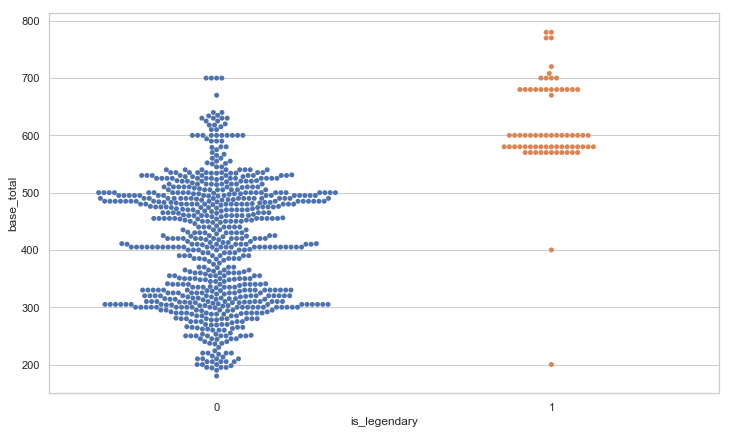

In [56]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,7))

sns.swarmplot(data = pokemon_df,y = 'base_total',x = 'is_legendary')
#plt.xlim(150,800)


### Plot L

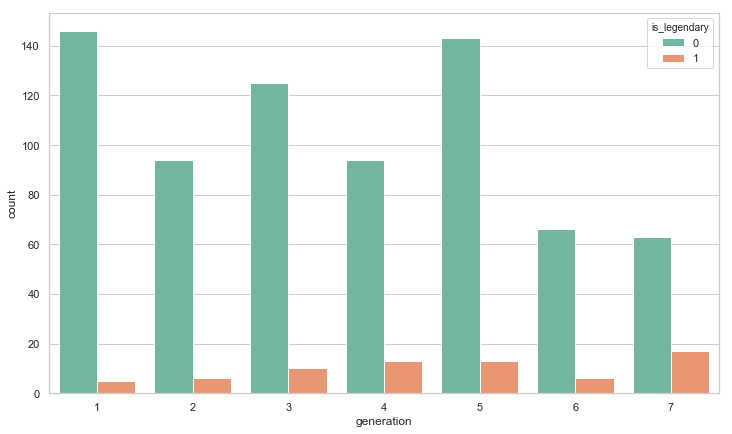

In [57]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,7))

sns.countplot(data = pokemon_df,hue = 'is_legendary',x = 'generation', palette='Set2')
#plt.xlim(150,800)


### Encoding

In [58]:
#Encoding using get_dummies method
just_dummy = pd.get_dummies(pokemon_df.loc[:,['type1','type2']])
pokemon_df_ml = pd.concat([pokemon_df, just_dummy], axis=1)      
pokemon_df_ml.drop(['type1','type2'], inplace=True, axis=1)
pokemon_df_ml.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'weight_kg', 'generation', 'total_abilities', 'total_types',
       'is_legendary', 'type1_bug', 'type1_dark', 'type1_dragon',
       'type1_electric', 'type1_fairy', 'type1_fighting', 'type1_fire',
       'type1_flying', 'type1_ghost', 'type1_grass', 'type1_ground',
       'type1_ice', 'type1_normal', 'type1_poison', 'type1_psychic',
       'type1_rock', 'type1_steel', 'type1_water', 'type2_NA', 'type2_bug',
       'type2_dark', 'type2_dragon', 'type2_electric', 'type

### Modelling

In [59]:
X = pokemon_df_ml.drop(['is_legendary'], axis = 1)
y = pokemon_df_ml['is_legendary']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                random_state = 1, stratify = y)

In [61]:
#Oversample the train 'is_legendary = 1' dataset
sm = SMOTE(random_state=1, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [62]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [63]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [64]:
from sklearn.metrics.scorer import SCORERS, roc_auc_score, f1_score

In [65]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [66]:
def gridsearchcv(estimator, param):
    
    gcv = GridSearchCV(estimator, param, cv = 5, verbose = 1, 
                       n_jobs = -1, scoring = 'roc_auc')
    gcv.fit(X_train_res, y_train_res)
    
    print("Best estimator:", gcv.best_estimator_)
    print("\nBest score (Train):", gcv.best_score_)
    print("\nBest score (Test):", gcv.score(X_test, y_test))

In [67]:
def alg_score(estimator):
    estimator.fit(X_train_res, y_train_res)
    probs = estimator.predict(X_test)
    auc = roc_auc_score(y_test, probs)
    return auc 

def cv_mean(estimator):
    return cross_val_score(estimator, X_train_res, y_train_res, cv = 5, 
                           n_jobs = -1, scoring = 'roc_auc').mean()

### Dummy Classifier

In [70]:
#Algorithm ROC-AUC Score
dummy = DummyClassifier()
print(alg_score(dummy))

0.48178506375227687


In [71]:
cv_mean(dummy)

0.5255462885738116

### Logistic Regression

In [72]:
lr = LogisticRegression()
print(alg_score(lr))

0.9112021857923498


/Users/Sulaiman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
cv_mean(lr)

0.993262293223224

In [74]:
param = {'penalty': ['l2', 'l1'], 'C': [0.01, 0.1, 1, 10, 100]}

gridsearchcv(lr, param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best estimator: LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Best score (Train): 0.998345336442169

Best score (Test): 0.9990892531876139


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished
/Users/Sulaiman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### kNN

In [75]:
knn = KNeighborsClassifier()
alg_score(knn)

0.9612932604735883

In [76]:
cv_mean(knn)

0.9944543172966631

In [77]:
param = {'n_neighbors': [3, 5, 7, 9]}

gridsearchcv(knn, param)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

Best score (Train): 0.9953050900080967

Best score (Test): 0.9924104432301153


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.6s finished


### Decision Tree

In [78]:
tree = DecisionTreeClassifier()
alg_score(tree)

1.0

In [79]:
cv_mean(tree)

0.9963469557964972

In [80]:
param = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9], 
         'min_samples_split': [5, 10, 13], 'max_features': [20,50,60]}

gridsearchcv(tree, param)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=60, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Best score (Train): 0.9999748878323176

Best score (Test): 0.9166666666666667


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.5s finished


### Plot M

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

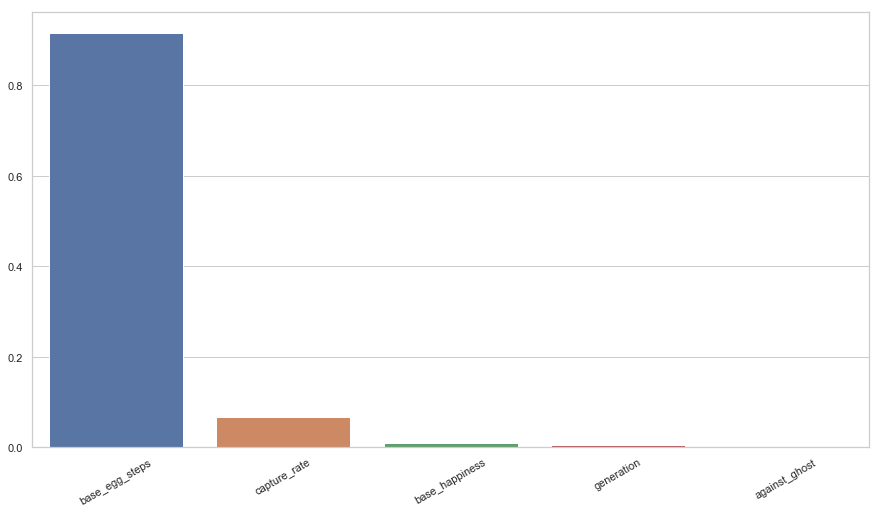

In [81]:
importances = tree.feature_importances_
features = X.columns.values

feat_importances = sorted(list(zip(features, importances)), key=lambda x:x[1], reverse=True)
feat_importances = feat_importances[:5]
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot([a[0] for a in feat_importances], [b[1] for b in feat_importances])
plt.xticks(rotation=30)

### Random Forest

In [82]:
rf = RandomForestClassifier()
alg_score(rf)

/Users/Sulaiman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9722222222222222

In [83]:
cv_mean(rf)

0.9999416917489622

In [84]:
param = {'n_estimators': [5, 7, 10, 13], 'max_depth': [5, 10, 15, 20], 'min_samples_split': [5, 10, 15], 
         'max_features': [20,50,60], 'min_samples_leaf': [4, 7, 10, 13]}

gridsearchcv(rf, param)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:   22.1s


Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Best score (Train): 0.9999834107498341

Best score (Test): 1.0


[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   40.1s finished


### Plot N

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

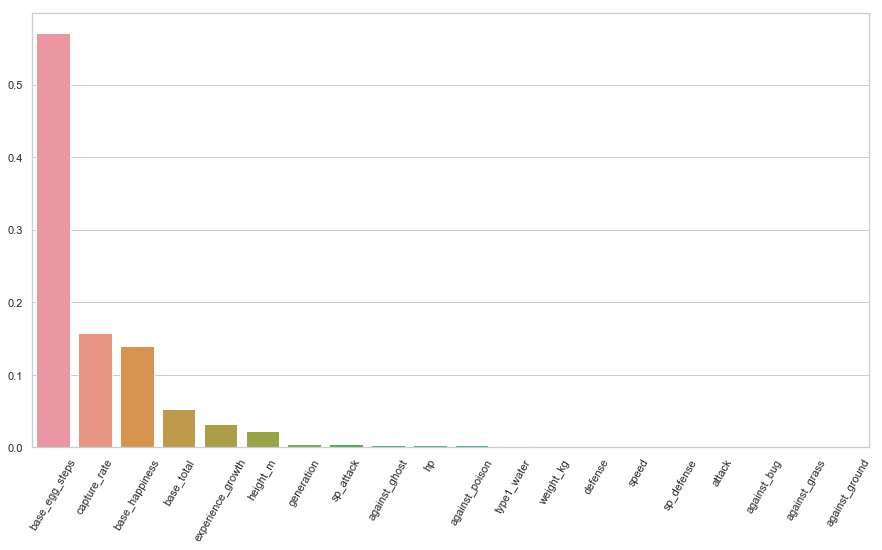

In [85]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns.values

feat_importances = sorted(list(zip(features, importances)), key=lambda x:x[1], reverse=True)
feat_importances = feat_importances[:20]
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot([a[0] for a in feat_importances], [b[1] for b in feat_importances])
plt.xticks(rotation=60)

### Gradient Boosting

In [86]:
gb = GradientBoostingClassifier()
alg_score(gb)

1.0

In [87]:
cv_mean(gb)

1.0

In [88]:
param = {'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [5, 7, 10, 13], 
         'max_depth': [3, 5, 7, 9], 
         'min_samples_leaf': [5, 8, 10, 13], 'min_samples_split': [5, 10, 15], 
         'max_features': [20,50,60]}

gridsearchcv(gb, param)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 3480 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 6280 tasks      | elapsed:  1.5min


Best estimator: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=60, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=13,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Best score (Train): 1.0

Best score (Test): 1.0


[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:  2.1min finished


### Gradient Boosting Confusion Matrix & Classification Report

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

gb.fit(X_train, y_train)
ypred = gb.predict(X_test)

print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

[[183   0]
 [  0  18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



### Gradient Boosting Confusion Matrix & Classification Report (Oversampling)

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

gb.fit(X_train_res, y_train_res)
ypred = gb.predict(X_test)

print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

[[183   0]
 [  0  18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



### Plot O

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

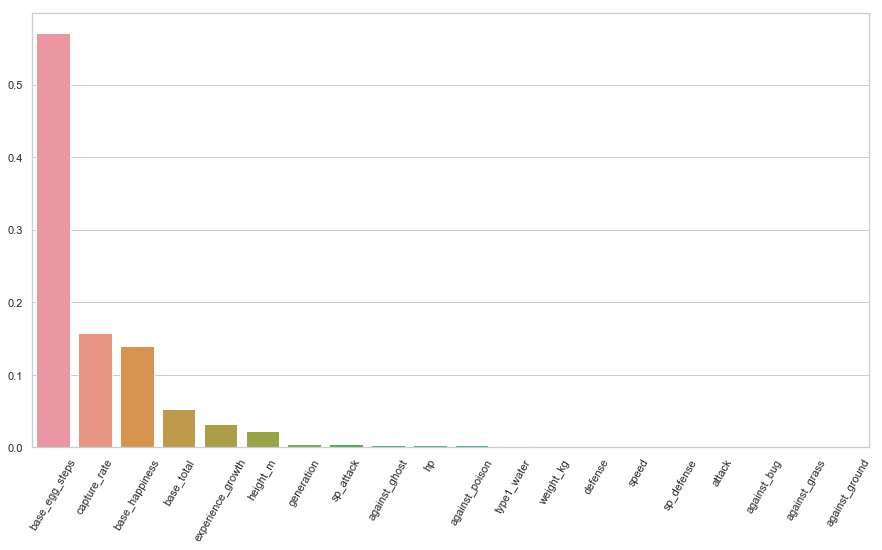

In [91]:
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=5,
              max_features=20, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=13, min_samples_split=15,
              min_weight_fraction_leaf=0.0, n_estimators=13,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

gb.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns.values

feat_importances = sorted(list(zip(features, importances)), key=lambda x:x[1], reverse=True)
feat_importances = feat_importances[:20]
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot([a[0] for a in feat_importances], [b[1] for b in feat_importances])
plt.xticks(rotation=60)

### Conclusion
- We classified which pokemon is legendary after EDA and ML.
- Most pokemons with lower capture rate are legendary pokemons
- Pokemons that are legendary have higher total base (higher attack, defense, hp, etc.)
- Newer generation pokemons tend to be legendary, not older generation! More legendary pokemons were introduced for newer generations
- Pokemon with lower no. of total abilities tends to be legendary. Our null hypothesis was proven wrong with the above plot. (refer Plot E)
- Dual-type pokemon tends to be legendary compared to single-type. Only 3% are legendary single-type compared to 5% that are legendary dual-type. (refer Plot D)

- The Dataset is imbalanced. We decided to oversample the training dataset and use ROC-AUC Score to measure the performance of each model. We noticed that by oversampling the train dataset, it helps to improve the roc-auc score.